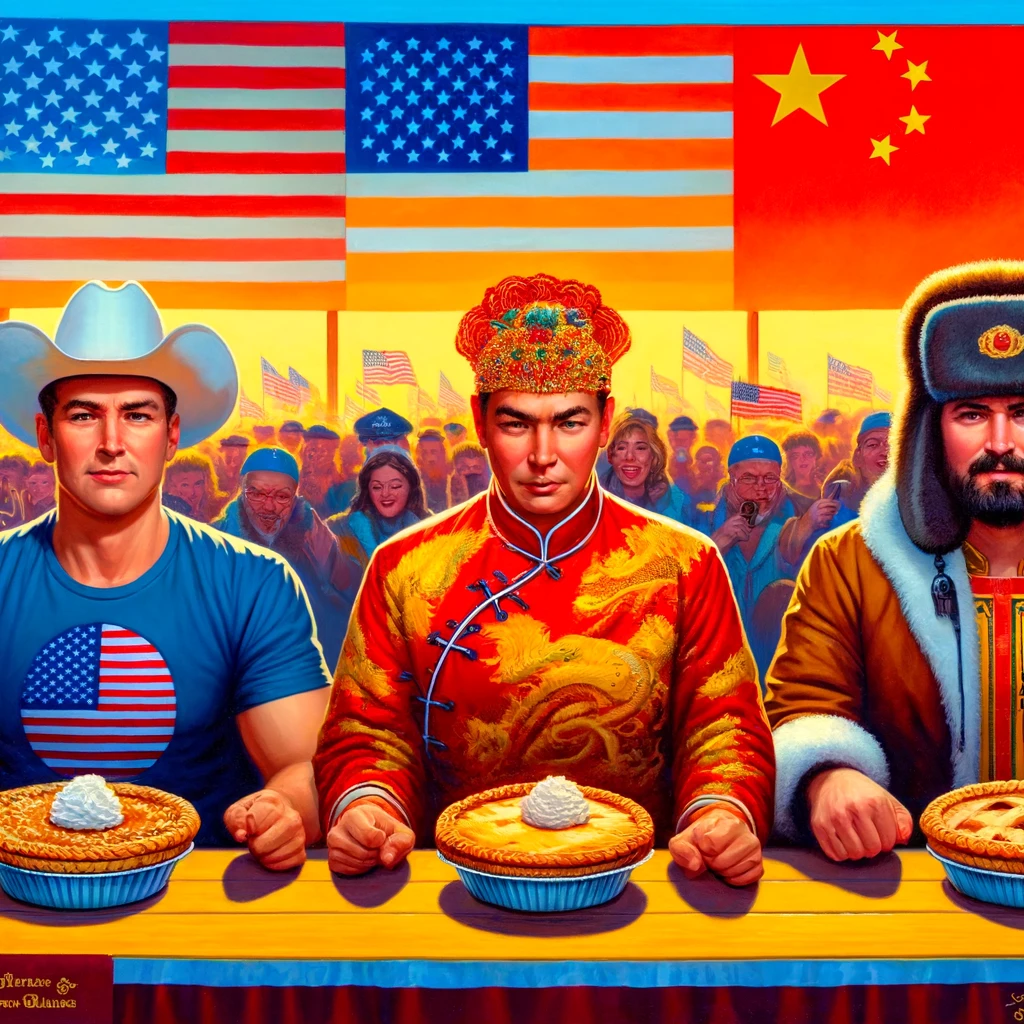

## This data was obtained from the World Health Organization

## The data is among adults, obesity is defined as having a BMI ≥ 30, and the data is age-standardized

## The goal of this analysis will be to compare obesity rates in the USA to those in China and Russia 

## As global tensions rise between these three world powers, I thought it would be intesting to compare their rates of obesity, since obesity is an enormous drain on the resources of a nation and also determines the amount of able-bodied recruits each country can call upon 

In [1]:
#import packages
import numpy as np
import pandas as pd
import math
import io
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pt
import os

In [2]:
df = pd.read_csv("/kaggle/input/obesity-among-adults-by-country-19752016/obesity-cleaned.csv", index_col = [0])

In [3]:
#take a look at the data
df.head()

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,Afghanistan,1976,0.2 [0.0-0.7],Male


## lets find the exact names used for the countries we want to subset

In [4]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia

In [5]:
#check the columns names
df.columns

Index(['Country', 'Year', 'Obesity (%)', 'Sex'], dtype='object')

In [6]:
# rename any columns with special characters and get everything standardized
df = df.rename(columns = {'Obesity (%)': 'obesity'})

In [7]:
# put the columns in lower case to not have to worry about typos
df.columns = [col.lower() for col in df.columns]

In [8]:
df.columns 

Index(['country', 'year', 'obesity', 'sex'], dtype='object')

In [9]:
#are all columns in the correct format?
df.dtypes

country    object
year        int64
obesity    object
sex        object
dtype: object

## lets isolate the mean obesity to be used in the graph 
## the column currently gives us obesity with stadard deviation, but we just want to work with the mean for now, and we need to convert it into a float for analysis

In [10]:
#create new column with just the mean
df['mean_obesity'] = df['obesity'].str.split(pat = '[').str[0]

In [11]:
#there are some strings in this column, we can deal with that by calling errors to convert them to NA
df['mean_obesity'] = pd.to_numeric(df['mean_obesity'], errors='coerce')

In [12]:
# we are left with 504 NAs 
df['mean_obesity'].isna().sum()

504

In [13]:
df['sex'].value_counts()

sex
Both sexes    8190
Male          8190
Female        8190
Name: count, dtype: int64

## Interestingly, the data come with the option to split the analysis of men and women 
## Are men more likely to be obese than women? How does this differ between countries?
## We can take a look at this later 

In [14]:
#isolate USA data
USA = df.query('(country == "United States of America") and (sex == "Both sexes")').copy()

In [15]:
USA.head()

,country,year,obesity,sex,mean_obesity
23436,United States of America,1975,11.9 [9.3-14.8],Both sexes,11.9
23439,United States of America,1976,12.2 [9.7-15.1],Both sexes,12.2
23442,United States of America,1977,12.6 [10.1-15.3],Both sexes,12.6
23445,United States of America,1978,13.0 [10.6-15.5],Both sexes,13.0
23448,United States of America,1979,13.3 [10.9-15.9],Both sexes,13.3


<Axes: xlabel='year'>

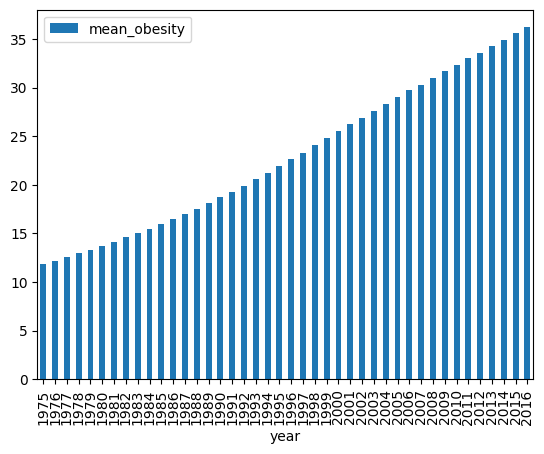

In [16]:
USA.plot(kind = 'bar', x = 'year', y = 'mean_obesity')

## lets add calculations for the average and overall growth rate for obesity over years 
## this will be helpful when comparing growth rates between each country 
## need to be careful not to just look at the graphs to determine the trend, but focus on the y axis

In [17]:
USA['growth_rate'] = USA['mean_obesity'].pct_change()

# Calculate the average annual growth rate
average_annual_growth_rateUSA = USA['growth_rate'].mean()

# Print the average annual growth rate
print("Average Annual Growth Rate:", average_annual_growth_rateUSA)

Average Annual Growth Rate: 0.027519724103241258


In [18]:
first_value = USA['mean_obesity'].iloc[0]
last_value = USA['mean_obesity'].iloc[-1]

# Calculate overall growth rate
overall_growth_rate = ((last_value - first_value) / first_value) * 100

# Print the overall growth rate
print("Overall Growth Rate:", overall_growth_rate, "%")

Overall Growth Rate: 204.20168067226894 %


In [19]:
#So in the USA 
print('US mean BMI:', USA['mean_obesity'].mean())
print("US Average Annual Growth Rate:", average_annual_growth_rateUSA)
print("US Overall Growth Rate:", overall_growth_rate, "%")
print('2016 mean obesity', USA['mean_obesity'].iloc[-1])


US mean BMI: 22.940476190476193
US Average Annual Growth Rate: 0.027519724103241258
US Overall Growth Rate: 204.20168067226894 %
2016 mean obesity 36.2


## So, lets break down these numbers 
## the average obesity rate over the entire span 1975-2016 is ~23
## since 1975 the rate has roughly tripled, and inceases each year on average by ~2.7% 
## and our most recent data point tells us that in 2016 around 36% of adults were obese 
## this means out of roughly 260 million adults in the US, nearly 100 million are currently obese

## On a side note, 

## Im not happy that the data ends in 2016. Lets pull in some additonal data and see what the obesity rate is in a more recent year

## This data I am pulling in is from the CDC, and gives obesity rates for each US state in 2022

In [20]:
df2 = pd.read_csv("/kaggle/input/2022-usa-obesity-by-state-from-cdc/2022-overall-prevalence.csv", index_col = [0])



In [21]:
df2.head()

,Prevalence,95% CI
State,,
Alabama,38.3,"(36.3, 40.3)"
Alaska,32.1,"(30.4, 33.9)"
Arizona,33.2,"(31.6, 34.9)"
Arkansas,37.4,"(35.6, 39.2)"
California,28.1,"(26.8, 29.4)"


In [22]:
df2['Prevalence'].mean()

33.718518518518515

## So in 2022 we see that the US average obesity rate by state is 33.7
## Still drastically high 

## Do we similar rates in China? Lets take a look 

In [23]:
CHINA = df.query('(country == "China") and (sex == "Both sexes")').copy()

<Axes: xlabel='year'>

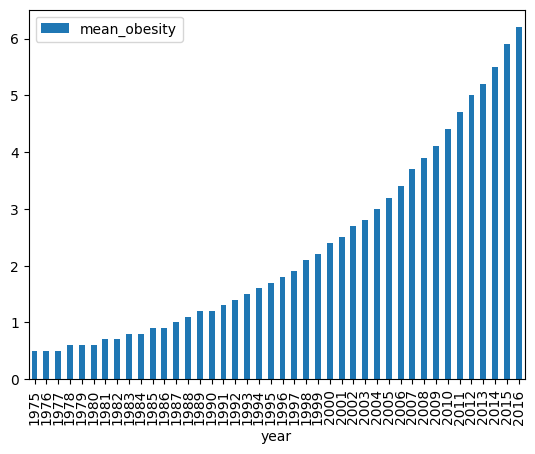

In [24]:
CHINA.plot(kind = 'bar', x = 'year', y = 'mean_obesity')

In [25]:
CHINA['growth_rate'] = CHINA['mean_obesity'].pct_change()

# Calculate the average annual growth rate
average_annual_growth_rate_CHINA = CHINA['growth_rate'].mean()

# Print the average annual growth rate
print("Average Annual Growth Rate:", average_annual_growth_rate_CHINA)

Average Annual Growth Rate: 0.0642655062855714


In [26]:
first_value = CHINA['mean_obesity'].iloc[0]
last_value = CHINA['mean_obesity'].iloc[-1]

# Calculate overall growth rate
overall_growth_rate_CHINA = ((last_value - first_value) / first_value) * 100

# Print the overall growth rate
print("Overall Growth Rate:", overall_growth_rate_CHINA, "%")

Overall Growth Rate: 1140.0 %


In [27]:
#In China

print('China mean BMI:', CHINA['mean_obesity'].mean())
print("China Average Annual Growth Rate:", average_annual_growth_rate_CHINA)
print("China Overall Growth Rate:", overall_growth_rate_CHINA, "%")
print('2016 mean obesity', CHINA['mean_obesity'].iloc[-1])

China mean BMI: 2.3023809523809526
China Average Annual Growth Rate: 0.0642655062855714
China Overall Growth Rate: 1140.0 %
2016 mean obesity 6.2


## So, in 2016 USA mean obesity rate is at 36.2 and China is at 6.2, a clean 30% difference
## lets have a look at everything together to better see how they compare

In [28]:
#Overall

print('US mean BMI:', USA['mean_obesity'].mean())
print("US Average Annual Growth Rate:", average_annual_growth_rateUSA)
print("US Overall Growth Rate:", overall_growth_rate, "%")

print('China mean BMI:', CHINA['mean_obesity'].mean())
print("China Average Annual Growth Rate:", average_annual_growth_rate_CHINA)
print("China Overall Growth Rate:", overall_growth_rate_CHINA, "%")

US mean BMI: 22.940476190476193
US Average Annual Growth Rate: 0.027519724103241258
US Overall Growth Rate: 204.20168067226894 %
China mean BMI: 2.3023809523809526
China Average Annual Growth Rate: 0.0642655062855714
China Overall Growth Rate: 1140.0 %


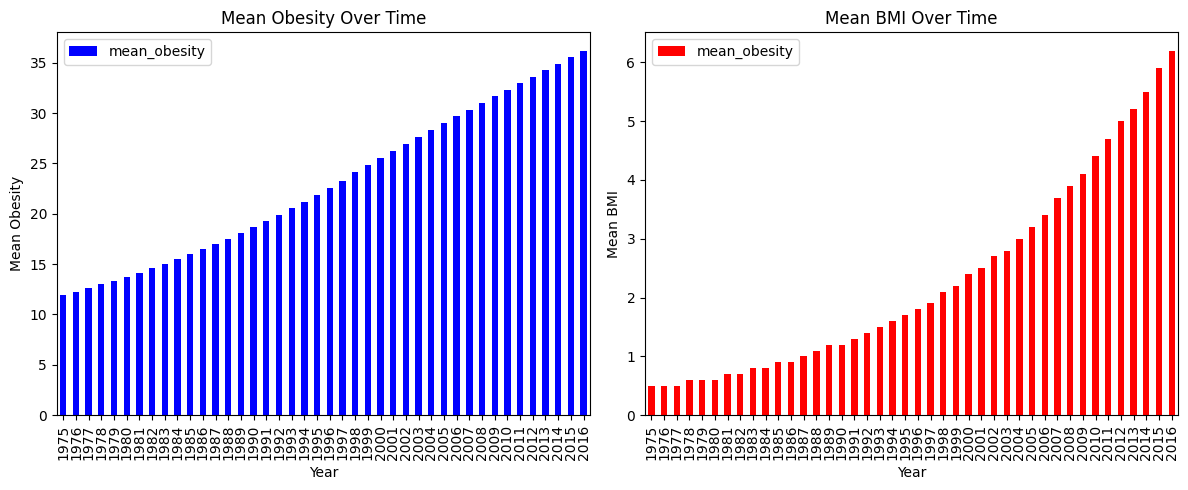

In [29]:
# Create a figure and a grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot mean_obesity on the first subplot
ax1 = (USA.plot(kind = 'bar', x = 'year', y = 'mean_obesity', ax = ax1, color = 'blue'))
ax1.set_title('Mean Obesity Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Obesity')

# Plot mean_bmi on the second subplot
ax2 = (CHINA.plot(kind = 'bar', x = 'year', y = 'mean_obesity', ax = ax2, color = 'red'))
ax2.set_title('Mean BMI Over Time')
ax2.set_xlabel('Year')
ax2.set_ylabel('Mean BMI')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Although obesity in China is growing at a much faster rate, it still has a long way to go before reaching anywhere close to the US

## it may not seem like it now, but due to how exponential growth works, China may catch up to the US in a very short amount of time. If this growth rate remains steady, China will reach 35% obesity in just 30 years.

## and dont be fooled by this low rate of 6%, since Chinas adult population is around 1 billion, this still represents around 60 million people!

## Is this dramatic difference in obesity due to genetics? food availability? culture and eating habits? physical activity? govermental oversight?

## surely some mix of all of the above, but there is clearly a large difference 

In [30]:
#now lets take a look at how the sexes differ in each country before including Russia 
#in our analysis
df['sex'].value_counts()

sex
Both sexes    8190
Male          8190
Female        8190
Name: count, dtype: int64

In [31]:
USAmen = df.query('(country == "United States of America") and (sex == "Male")').copy()
USAwomen = df.query('(country == "United States of America") and (sex == "Female")').copy()

print('USA men mean obesity:', USAmen['mean_obesity'].mean())
print('USA women mean obesity:', USAwomen['mean_obesity'].mean())

print('USA men mean obesity:', USAmen['mean_obesity'].iloc[-1])
print('USA women mean obesity:', USAwomen['mean_obesity'].iloc[-1])

USA men mean obesity: 21.502380952380957
USA women mean obesity: 24.247619047619047
USA men mean obesity: 35.5
USA women mean obesity: 37.0


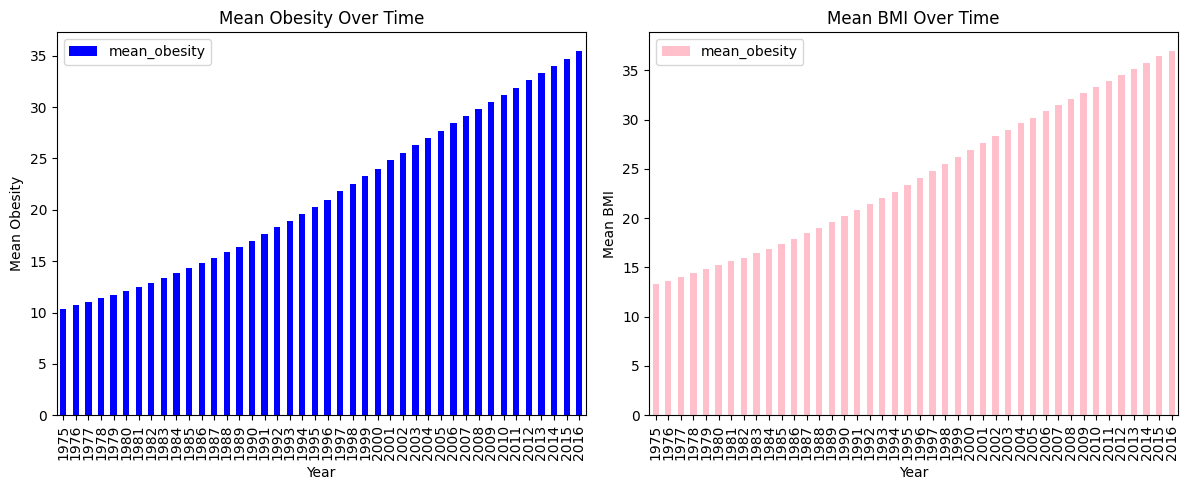

In [32]:
# Create a figure and a grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot mean_obesity on the first subplot
ax1 = (USAmen.plot(kind = 'bar', x = 'year', y = 'mean_obesity', ax = ax1, color = 'blue'))
ax1.set_title('Mean Obesity Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Obesity')

# Plot mean_bmi on the second subplot
ax2 = (USAwomen.plot(kind = 'bar', x = 'year', y = 'mean_obesity', ax = ax2, color = 'pink'))
ax2.set_title('Mean BMI Over Time')
ax2.set_xlabel('Year')
ax2.set_ylabel('Mean BMI')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## surprisingly, women were actual more likely to be obese in the 70's but men have since caught up and the numbers are now similar 

In [33]:
CHINAmen = df.query('(country == "China") and (sex == "Male")').copy()
CHINAwomen = df.query('(country == "China") and (sex == "Female")').copy()

print('China men mean obesity:', CHINAmen['mean_obesity'].mean())
print('China women mean obesity:', CHINAwomen['mean_obesity'].mean())

print('China men 2016 obesity:', CHINAmen['mean_obesity'].iloc[-1])
print('China women 2016 obesity:', CHINAwomen['mean_obesity'].iloc[-1])

China men mean obesity: 1.85
China women mean obesity: 2.7785714285714285
China men 2016 obesity: 5.9
China women 2016 obesity: 6.5


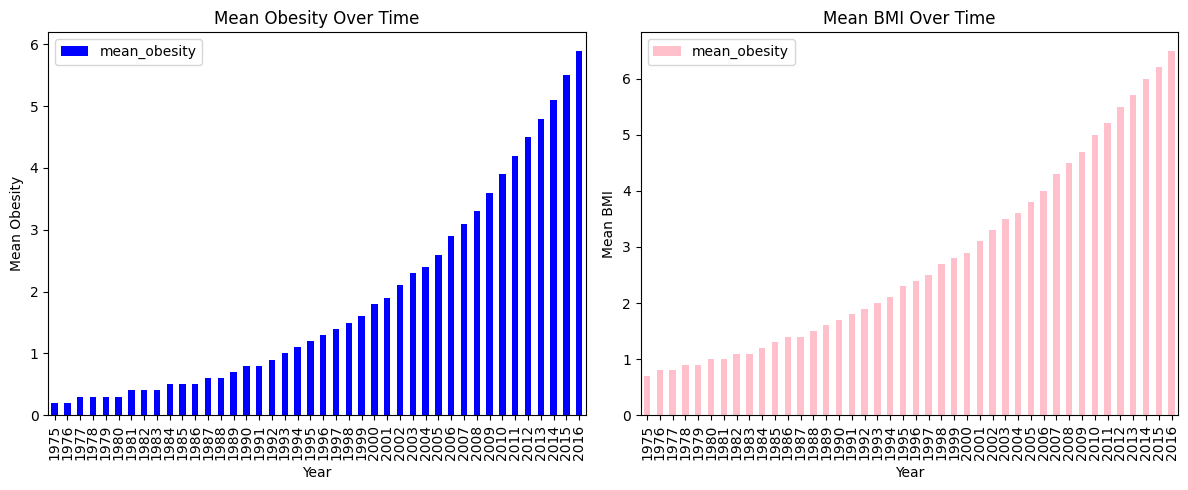

In [34]:
# Create a figure and a grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot mean_obesity on the first subplot
ax1 = (CHINAmen.plot(kind = 'bar', x = 'year', y = 'mean_obesity', ax = ax1, color = 'blue'))
ax1.set_title('Mean Obesity Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Obesity')

# Plot mean_bmi on the second subplot
ax2 = (CHINAwomen.plot(kind = 'bar', x = 'year', y = 'mean_obesity', ax = ax2, color = 'pink'))
ax2.set_title('Mean BMI Over Time')
ax2.set_xlabel('Year')
ax2.set_ylabel('Mean BMI')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Similar trend for China between sexes compared to the US 

In [35]:
# lets finally include Russia 

RUSSIA = df.query('(country == "Russian Federation") and (sex == "Both sexes")').copy()

In [36]:
RUSSIA['growth_rate'] = RUSSIA['mean_obesity'].pct_change()

# Calculate the average annual growth rate
average_annual_growth_rate_RUSSIA = RUSSIA['growth_rate'].mean()

# Print the average annual growth rate
print("Average Annual Growth Rate RUSSIA:", average_annual_growth_rate_RUSSIA)

Average Annual Growth Rate RUSSIA: 0.012472070337989829


In [37]:
print('RUSSIA mean obesity:', RUSSIA['mean_obesity'].mean())
print('2016 mean obesity', RUSSIA['mean_obesity'].iloc[-1])
print("Average Annual Growth Rate RUSSIA:", average_annual_growth_rate_RUSSIA)

RUSSIA mean obesity: 18.357142857142858
2016 mean obesity 23.1
Average Annual Growth Rate RUSSIA: 0.012472070337989829


<Axes: xlabel='year'>

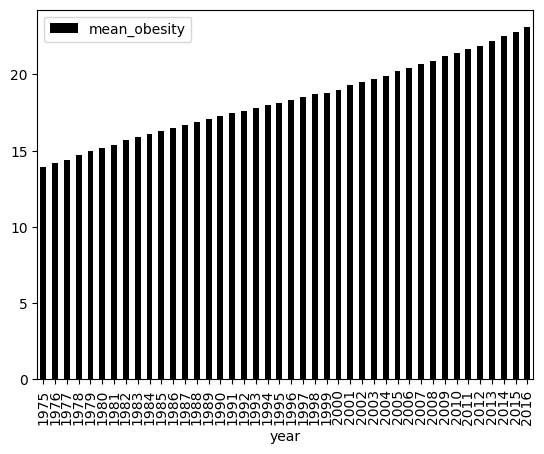

In [38]:
RUSSIA.plot(kind = 'bar', x = 'year', y = 'mean_obesity', color = 'black')

## Russia has a much lower obesity rate than the US, and it is growing at less than half of the pace 

## remember the importance of growth rate here. When we are dealing with rates that reflect hundreds of millions of people, an increase in 1% is quite dramatic, and will make an increasingly large impact year after year

## since there are around 260 million adults in the US, an increase of 1% means an additional 2.6 million people with obesity the next year. The following year it will be even more, as now you take 1% of 262 million. 
## This process is called exponential growth!!! 

In [39]:
#now, just for fun, lets determine the countries with the highest and lowest BMI

#Here are the top 10 LOWEST obesity rates by country in 2016

df.query('year == 2016').groupby('country')['mean_obesity'].mean().sort_values().head(10)

country
Viet Nam             2.100000
Bangladesh           3.633333
Timor-Leste          3.766667
Cambodia             3.800000
India                3.900000
Nepal                4.066667
Japan                4.266667
Ethiopia             4.433333
Republic of Korea    4.633333
Eritrea              4.866667
Name: mean_obesity, dtype: float64

In [40]:
#Here are the top 10 HIGHEST obesity rates by country in 2016

df.query('year == 2016').groupby('country')['mean_obesity'].mean().sort_values(ascending = False).head(20)

country
Nauru                               61.000000
Cook Islands                        55.900000
Palau                               55.300000
Marshall Islands                    52.866667
Tuvalu                              51.600000
Niue                                49.966667
Tonga                               48.033333
Samoa                               47.400000
Kiribati                            46.000000
Micronesia (Federated States of)    45.800000
Kuwait                              38.933333
Qatar                               36.900000
United States of America            36.233333
Saudi Arabia                        36.166667
Jordan                              35.600000
United Arab Emirates                33.400000
Libya                               32.366667
Lebanon                             32.133333
Egypt                               31.933333
Turkey                              31.900000
Name: mean_obesity, dtype: float64

## Many of the top countries are extremely small and should not be directly compared to much larger nations, so I included more

## Please note that obesity as defined here (BMI >= 30) is not the perfect measure of the health of a nation, and the BMI scale does have its flaws. BMI simply provides us a easy and non-invasive way to characterize peoples weight status. Having obesity as defined by BMI does not necessarily indicate poor health, but it is still a relatively strong measure when being applied to large samples
## The qualification for obesity could be strengthened significantly by dividing it into additional categories based on BMI. Putting someone at 45 BMI in the same class as someone with 30 is not ideal
## This data has several flaws, but provides us a great way to take a look at the overall health of entire nations!

## So, this is the end of my analysis. Thanks for taking a look and I hope it was interesting :)